In [ ]:
from tensorflow import train
from sklearn.utils import shuffle
import numpy
from tensorflow.keras.datasets import cifar10 as image_dataset
import matplotlib.pyplot as plt


(training_images_temp, traiing_label_temp), (testing_images_temp, testing_label_temp) = image_dataset.load_data()

images = numpy.concatenate((training_images_temp, testing_images_temp), axis=0)
labels = numpy.concatenate((traiing_label_temp, testing_label_temp), axis=0)
in
images =  images / 255.0

images = shuffle(images, random_state=42)
labels = shuffle(labels, random_state=42)

images_shape = images[1].shape


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


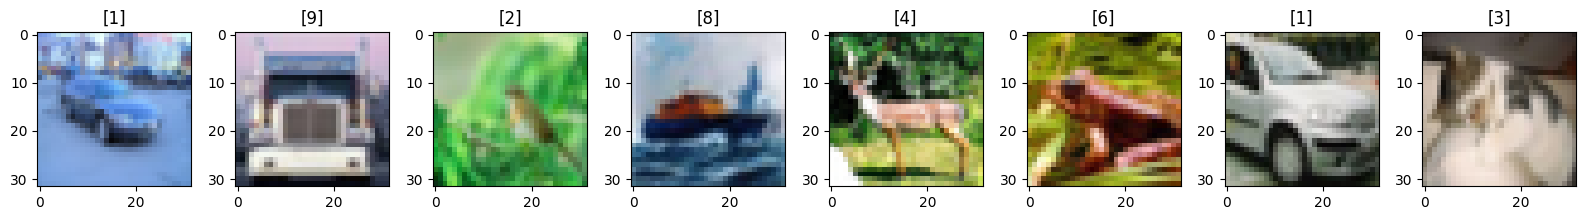

In [ ]:
#checking the images
figure, axis = plt.subplots(1, 8, figsize=(20, 2))
for i in range(0, 8):
  axis[i].imshow(images[i])
  axis[i].set_title(labels[i])
plt.show()


In [ ]:
start_training_range = 0
end_training_range = int(len(images) * 0.75)

start_validation_range = end_training_range
end_validation_range = end_training_range + int(len(images) * 0.15)

start_testing_range = end_validation_range

In [ ]:
(images, labels) = shuffle(images, labels, random_state=42)

In [ ]:
# 70%
training_iamges = images[start_training_range:end_training_range]
training_labels = labels[start_training_range:end_training_range]
# 15%
validation_images = images[start_validation_range:end_validation_range]
validation_labels = labels[start_validation_range:end_validation_range]
# 15%
testing_images = images[start_testing_range:]
testing_labels = labels[start_testing_range:]

In [ ]:
from tensorflow.keras import layers, models as mdl, Input

In [ ]:
# i am giving it ~8 layers as 6-8 layers are appropriate for 60,000 images

model = mdl.Sequential([

    # 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=images_shape),
    layers.BatchNormalization(),
    # 2
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    # 4
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # 5
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    # 6
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlu_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 30,
    restore_best_weights = True
)

In [16]:
fit = model.fit(
    training_iamges,
    training_labels,
    epochs = 30,
    batch_size = 64,
    validation_data = (validation_images, validation_labels),
    callbacks = [earlu_stopping]
)

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 221s 314ms/step - accuracy: 0.5080 - loss: 1.3801 - val_accuracy: 0.4374 - val_loss: 1.6551
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 258s 308ms/step - accuracy: 0.6238 - loss: 1.0660 - val_accuracy: 0.6413 - val_loss: 1.0180
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 211s 300ms/step - accuracy: 0.6812 - loss: 0.9093 - val_accuracy: 0.7110 - val_loss: 0.8038
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 213s 302ms/step - accuracy: 0.7230 - loss: 0.7970 - val_accuracy: 0.6813 - val_loss: 0.8867
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 264s 305ms/step - accuracy: 0.7496 - loss: 0.7163 - val_accuracy: 0.7098 - val_loss: 0.8361
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 262s 306ms/step - accuracy: 0.7684 - loss: 0.6644 - val_accuracy: 0.7122 - val_loss: 0.8320
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 257s 298ms/step - accuracy: 0.7832 - loss: 0.6254 - val_accuracy: 0.7564 - val_loss: 0.7119
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 262s 299ms/step - accuracy: 0.7939 -

In [19]:
model.save("./image_classification_model.keras")
model.export("./image_classification_model")

Saved artifact at './image_classification_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  133776440336528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133776440338640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133776440339216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133776440338832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133776440339600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133776440338448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133776440337872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133776440339408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133776440339792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133776440340560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133

In [20]:
loss, acc = model.evaluate(validation_images, validation_labels)
print("Validation loss = ", loss)
print("Validation Accuracy = ", acc)

loss, acc = model.evaluate(testing_images, testing_labels)
print("Testing loss = ", loss)
print("Testing Accuracy = ", acc)

282/282 ━━━━━━━━━━━━━━━━━━━━ 24s 87ms/step - accuracy: 0.7839 - loss: 0.6293
Validation loss =  0.6339283585548401
Validation Accuracy =  0.7818889021873474
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7994 - loss: 0.5976
Testing loss =  0.607474148273468
Testing Accuracy =  0.7979999780654907


In [ ]:
accuracy = fit.history['accuracy']
val_accuracy = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(len(accuracy))

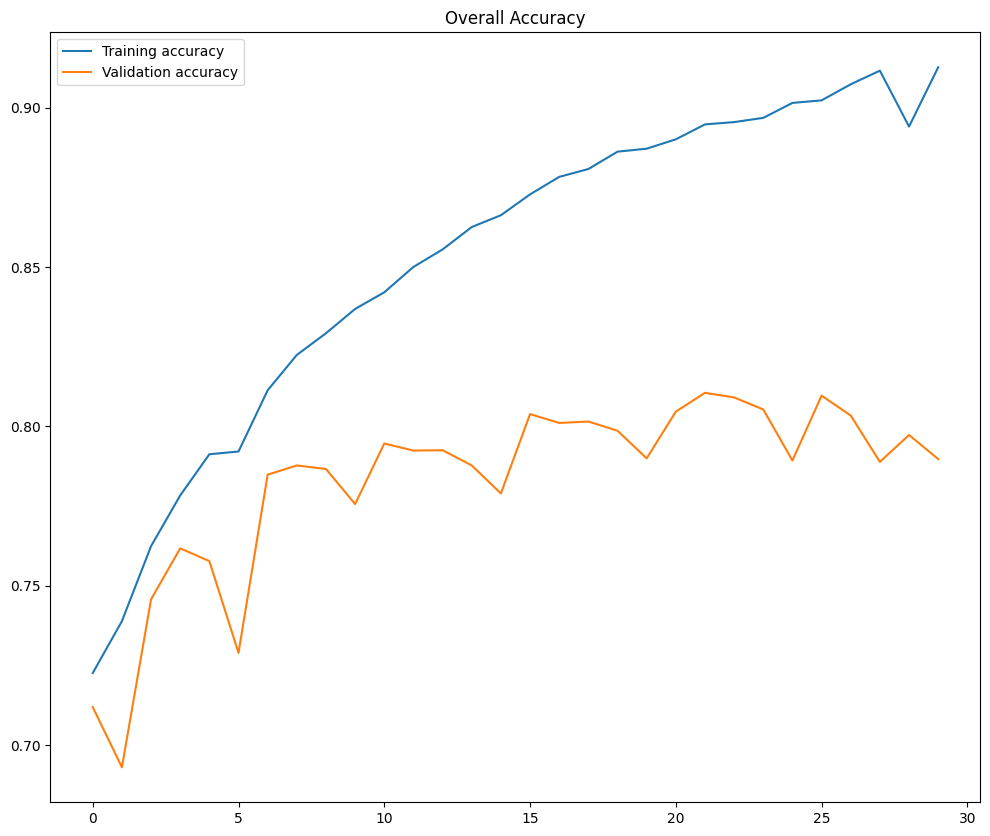

In [ ]:
# for accuracy
plt.figure(figsize = (12, 10))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title("Overall Accuracy")
plt.legend()
plt.show()

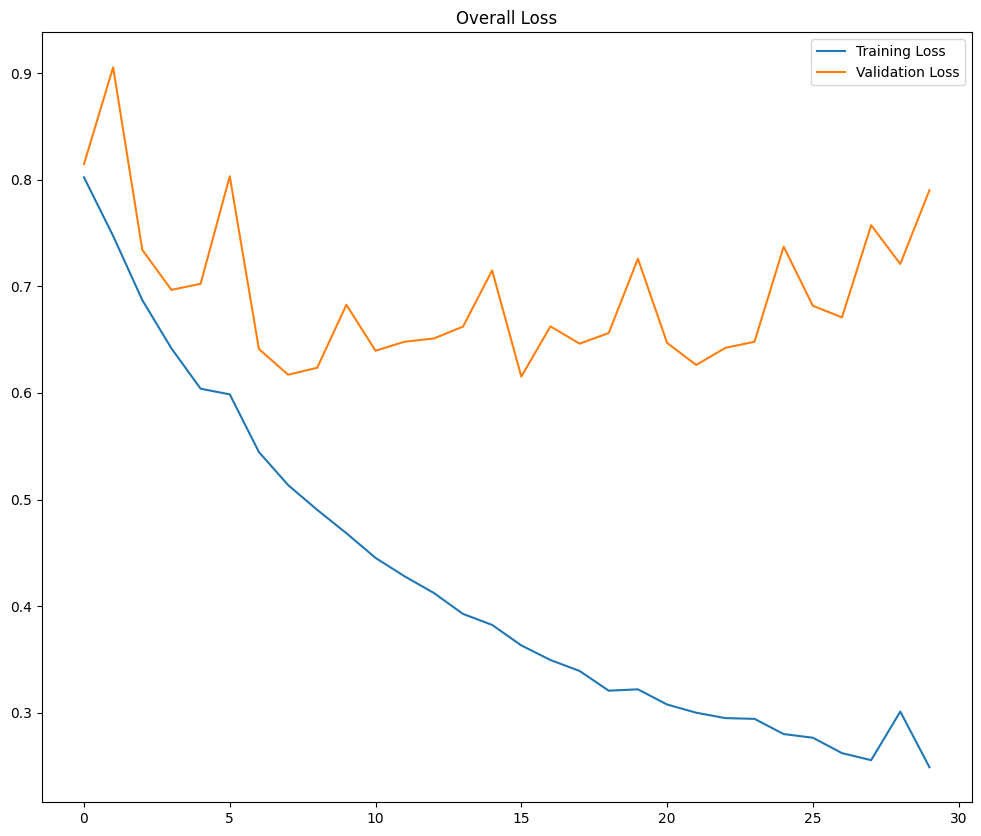

In [ ]:
# for loss
plt.figure(figsize = (12, 10))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title("Overall Loss")
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(testing_images)
labels_for_prediction = numpy.argmax(predictions, axis=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step


In [ ]:
from sklearn.metrics import classification_report

In [ ]:

#given label classes on https://www.kaggle.com/competitions/cifar-10/data
label_classes = ["airplan", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# R E P O R T - F O R - PRECISION, RECALL, F1_SCORE, SUPPORT
print(classification_report(testing_labels, labels_for_prediction, target_names=label_classes))

              precision    recall  f1-score   support

     airplan       0.05      0.00      0.01       635
  automobile       0.00      0.00      0.00       582
        bird       0.09      0.87      0.17       584
         cat       0.09      0.08      0.08       582
        deer       0.00      0.00      0.00       610
         dog       0.17      0.01      0.02       577
        frog       0.00      0.00      0.00       634
       horse       0.00      0.00      0.00       597
        ship       0.00      0.00      0.00       593
       truck       0.00      0.00      0.00       606

    accuracy                           0.09      6000
   macro avg       0.04      0.10      0.03      6000
weighted avg       0.04      0.09      0.03      6000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-1035844119.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


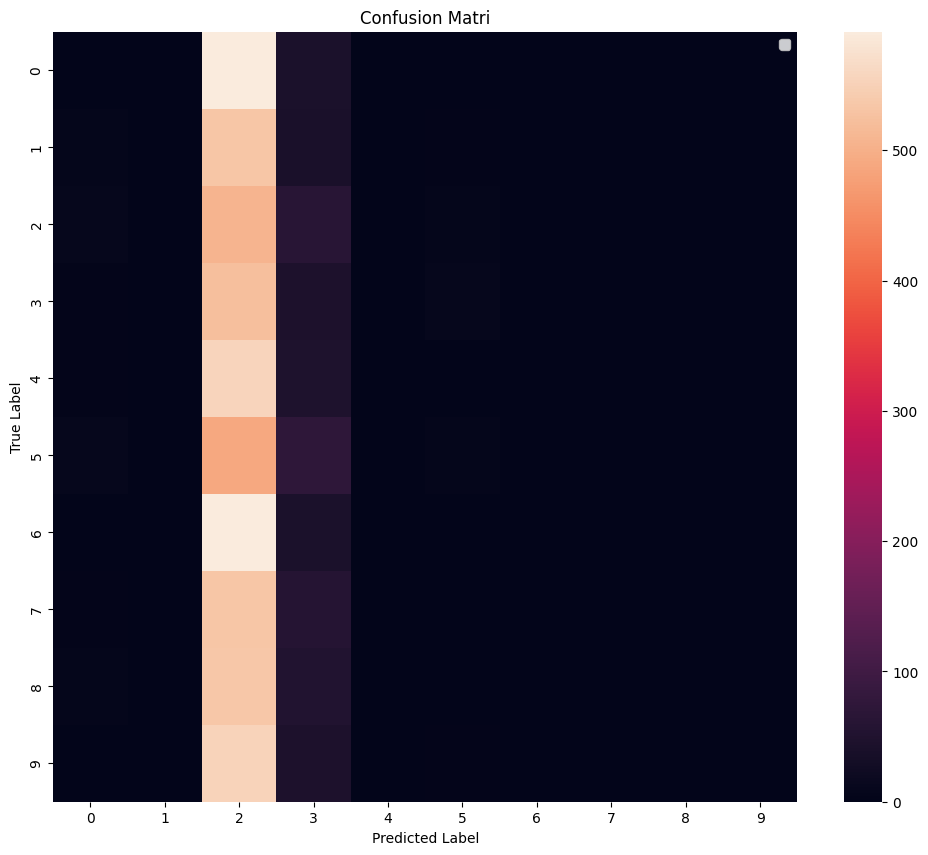

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import seaborn


# COMFUISION MATRIX
confusion_matrix = confusion_matrix(testing_labels, labels_for_prediction)

plt.figure(figsize = (12, 10))
seaborn.heatmap(confusion_matrix)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matri")
plt.legend()
plt.show()